In [3]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from PIL import Image
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
data_directory = './data/result_wav/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 64, 64  # 이미지 크기 설정 (64x64)
num_classes = 9  # 클래스 수 설정 (babycry, boil, carhorn 등 총 9개 클래스)

# 데이터셋 준비
X_data = []  # 이미지 데이터 배열
y_data = []  # 레이블 배열

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
        class_number = int(filename.split('_')[0])
        # 이미지 파일 경로 설정
        img_path = os.path.join(data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = Image.open(img_path).resize((img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = np.array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
        X_data.append(img_array.flatten())  # 이미지를 1차원 벡터로 변환하여 X_data 리스트에 추가
        y_data.append(class_number)  # 클래스 번호를 y_data 리스트에 추가

# 리스트를 numpy 배열로 변환
X_data = np.array(X_data)
y_data = np.array(y_data)

# 데이터셋을 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# 랜덤포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 평가
y_pred = rf_model.predict(X_test)

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))  # 혼동 행렬 출력

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")


시작 시간: Fri Jul 26 22:02:22 2024
Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       164
           1       0.86      0.87      0.87       241
           2       0.80      0.53      0.64       225
           3       0.76      0.84      0.80       424
           4       0.93      0.80      0.86       105
           5       0.98      0.82      0.89       162
           6       0.94      0.86      0.90       592
           7       0.77      0.94      0.84       701
           8       0.83      0.70      0.76       153

    accuracy                           0.84      2767
   macro avg       0.87      0.81      0.84      2767
weighted avg       0.85      0.84      0.84      2767

Confusion Matrix:

[[154   0   0   6   0   0   0   4   0]
 [  0 210   0   4   0   0   3  24   0]
 [  0   7 120  34   4   2   4  40  14]
 [  1   0   2 357   2   0   3  59   0]
 [  0   0   2   7  84   0   1  11   0]
 [  0   0   2   3   0 133

시작 시간: Fri Jul 26 22:20:11 2024
Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       164
           1       0.86      0.87      0.87       241
           2       0.80      0.53      0.64       225
           3       0.76      0.84      0.80       424
           4       0.93      0.80      0.86       105
           5       0.98      0.82      0.89       162
           6       0.94      0.86      0.90       592
           7       0.77      0.94      0.84       701
           8       0.83      0.70      0.76       153

    accuracy                           0.84      2767
   macro avg       0.87      0.81      0.84      2767
weighted avg       0.85      0.84      0.84      2767

Confusion Matrix:

[[154   0   0   6   0   0   0   4   0]
 [  0 210   0   4   0   0   3  24   0]
 [  0   7 120  34   4   2   4  40  14]
 [  1   0   2 357   2   0   3  59   0]
 [  0   0   2   7  84   0   1  11   0]
 [  0   0   2   3   0 133

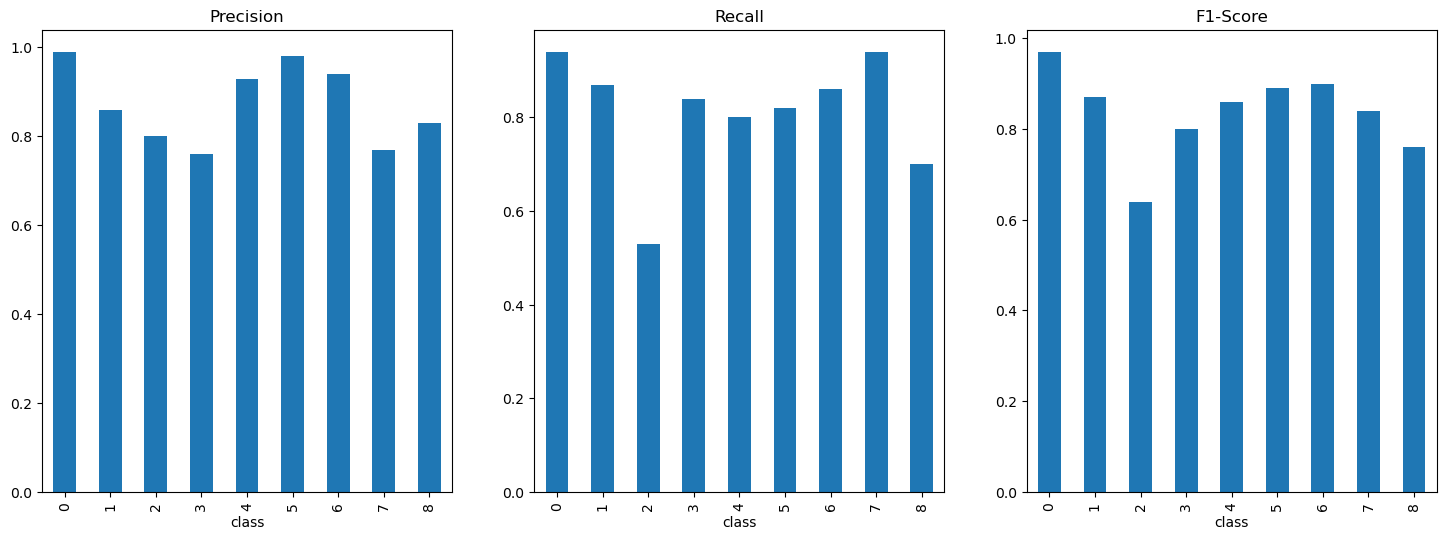

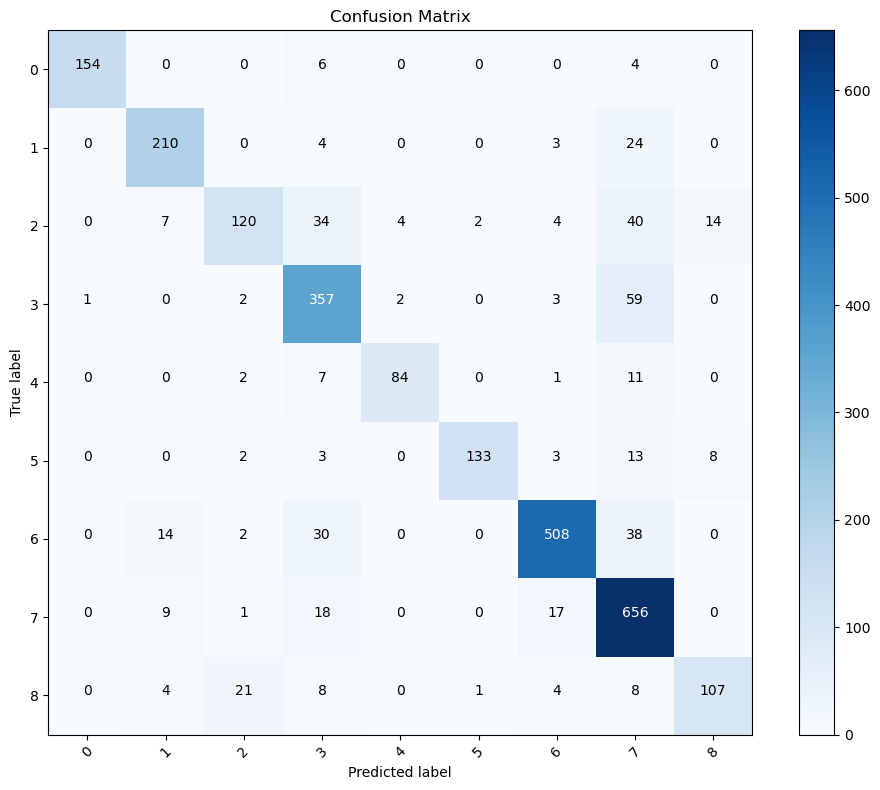

종료 시간: Fri Jul 26 22:21:44 2024
소요 시간: 93.14초


In [2]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from PIL import Image
import time
import matplotlib.pyplot as plt
import pandas as pd

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
data_directory = './data/result_wav/'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 64, 64  # 이미지 크기 설정 (64x64)
num_classes = 9  # 클래스 수 설정 (babycry, boil, carhorn 등 총 9개 클래스)

# 데이터셋 준비
X_data = []  # 이미지 데이터 배열
y_data = []  # 레이블 배열

# 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
for filename in os.listdir(data_directory):
    if filename.endswith('.png'):  # PNG 파일만 처리
        # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
        class_number = int(filename.split('_')[0])
        # 이미지 파일 경로 설정
        img_path = os.path.join(data_directory, filename)
        # 이미지 불러오기 및 전처리
        img = Image.open(img_path).resize((img_height, img_width))  # 이미지 로드 및 크기 조정
        img_array = np.array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
        X_data.append(img_array.flatten())  # 이미지를 1차원 벡터로 변환하여 X_data 리스트에 추가
        y_data.append(class_number)  # 클래스 번호를 y_data 리스트에 추가

# 리스트를 numpy 배열로 변환
X_data = np.array(X_data)
y_data = np.array(y_data)

# 데이터셋을 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# 랜덤포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 평가
y_pred = rf_model.predict(X_test)

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(num_classes)])
print(report)  # 분류 보고서 출력
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)  # 혼동 행렬 출력

# 분류 보고서 시각화
def plot_classification_report(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:len(lines)-3]:
        row = {}
        row_data = line.split()
        if len(row_data) < 5:  # 만약 리스트의 길이가 예상보다 짧다면 무시합니다.
            continue
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = int(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    dataframe.plot(x='class', y='precision', kind='bar', ax=ax[0], legend=False)
    dataframe.plot(x='class', y='recall', kind='bar', ax=ax[1], legend=False)
    dataframe.plot(x='class', y='f1_score', kind='bar', ax=ax[2], legend=False)
    ax[0].set_title('Precision')
    ax[1].set_title('Recall')
    ax[2].set_title('F1-Score')
    plt.show()

# 혼동 행렬 시각화
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# 분류 보고서 생성 및 시각화
plot_classification_report(report)

# 혼동 행렬 생성 및 시각화
plot_confusion_matrix(cm, class_names=[str(i) for i in range(num_classes)])

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")
